# STARBUCKS NUTRITION ANALYSIS

***Today we are trying the analyse the nutrition content of Starbucks menu and find out 5 beverage/food that should be best avoided for a healthier choice of diet.***


In [125]:
# importing requried libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [126]:
# import csv file
data = pd.read_csv('starbucks_drinkMenu_expanded.csv', encoding= 'unicode_escape')

In [127]:
#Viewing the tables of - starbucks drink menu expanded
data.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    int64  

In [107]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [108]:
data.shape

(242, 18)

In [128]:
df = data.drop_duplicates()

In [129]:
data.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [130]:
data.isnull().sum()


Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

# DATA CLEANING

In [131]:

# Removing "%" from percent columns
data = data.replace({'Vitamin A (% DV) ': {'%': ''}, 'Vitamin C (% DV)': {'%': ''},
                                     ' Calcium (% DV) ': {'%': ''}, 'Iron (% DV) ': {'%': ''}}, regex=True)

# 'Iron (% DV)' includes percentages in the form of #.00%, so we will need to do some more work
data = data.replace({'Iron (% DV) ': {'.00': ''}}, regex=True)

# Replace troublesome entry
data.loc[237, ' Total Fat (g)'] = '3.2'

In [132]:
# Impute None for "Varies" since we don't know value
data = data.replace({'Caffeine (mg)': {'Varies': None, 'varies': None}})

In [133]:
data.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330


In [116]:
data.tail(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0.0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0.0
241,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8,0,15,0,0.0


In [134]:
# Now we will convert the columns to a number format using the .to_numeric function
# We use the .apply function to apply .to_numeric to multiple columns
columns_to_change = ['Vitamin A (% DV) ','Vitamin C (% DV)',' Calcium (% DV) ','Iron (% DV) ','Caffeine (mg)',' Total Fat (g)']
data[columns_to_change] = data[columns_to_change].apply(pd.to_numeric)
data.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                    int64
Caffeine (mg)                float64
dtype: object

In [135]:
data.isnull().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

In [136]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

# Exploratory Data Analysis

In [137]:
data.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,219.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,89.520548
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,64.726831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,50.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,75.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,142.500000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000


***Brief Description of the dataset***

*The Starbucks Drinks Menu dataset contains information of various drinks available at Starbucks and their constituents which include Total Fat, Trans Fat, Saturated Fat, Sodium, Total Carbohydrates, Cholesterol, Dietary Fibre, Sugars, Protein, Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV) and Caffeine. The dataset includes 242 observations and the following features:

*Beverage_category: categorical variable indicating the category of drinks at starbucks 
*Beverage: categorical variable indicating the name of beverage 
*Beverage_prep: categorical variable indicating the size of beverage size 
*Calories,Fat,Trans Fat,Saturated Fat,Sodium, Carbohydrates,Cholesterol,Fibre,Sugars,Protein,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine - All these columns indicate the aount of it in the drink

# VISUALISATION

#### 1. Distribution of beverages on the basis of the category, the types of drinks available in each category and the distribution of beverage preperation.

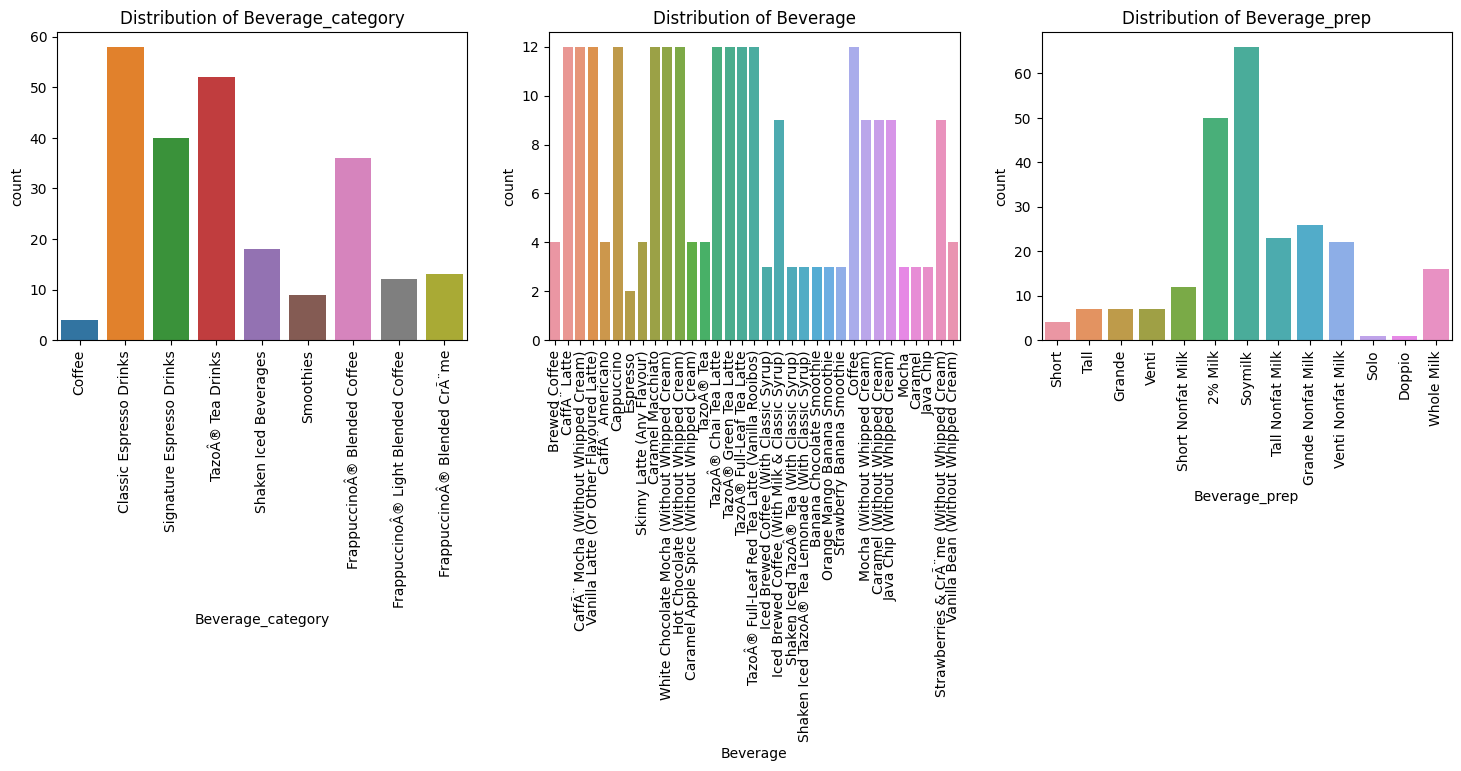

In [138]:
# Plotting graphs
plt.figure(figsize=(18,4))

# Distribution of Beverage Category
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Beverage_category').set_title('Distribution of Beverage_category')
plt.xticks(rotation=90)

# Distribution of Beverage
plt.subplot(1, 3, 2) 
sns.countplot(data=data, x='Beverage').set_title('Distribution of Beverage') # Create countplot and set title
plt.xticks(rotation=90) # Rotate the x-axis labels 90 degrees

# Create next plot below
plt.subplot(1, 3, 3) 
sns.countplot(data=data, x='Beverage_prep').set_title('Distribution of Beverage_prep') 
plt.xticks(rotation=90) 

plt.show() 

***From the first Bar Graph, we can observe that the maximum number of beverages are Classic Espresso Drinks and the least number of beverages are Coffee. 
From the second graph, we get a distribution of beverages where Espresso has the least count
And from the third graph, we can observe that soymilk has the maximum count whereas Solo and Doppio has the least count.***

### 2.Nutrient quantity analysis on Beverage

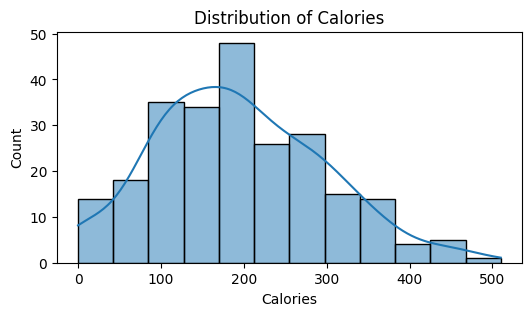

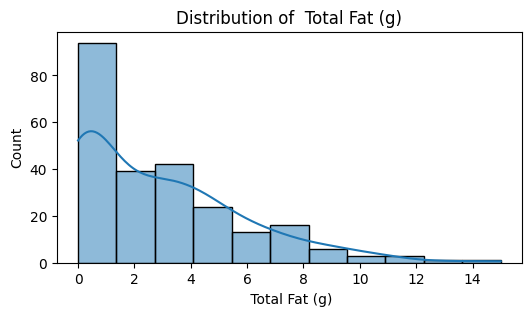

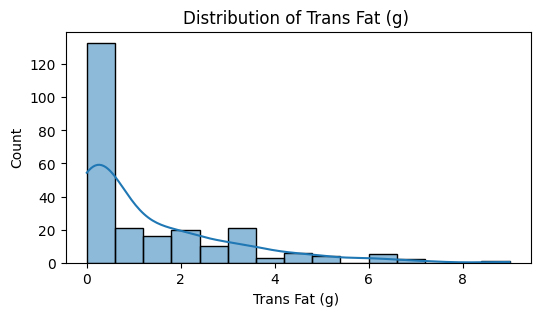

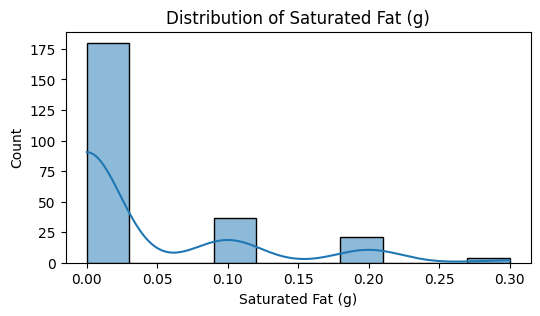

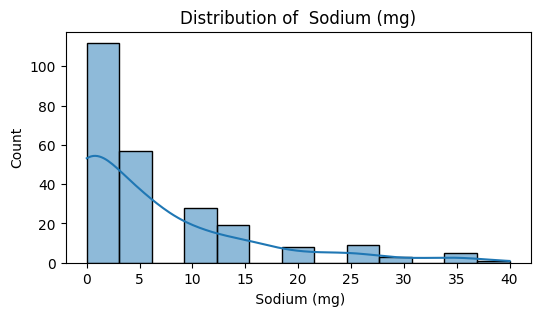

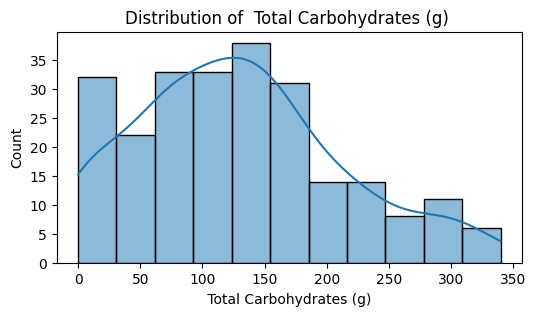

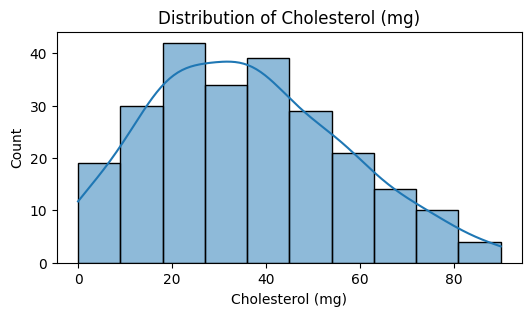

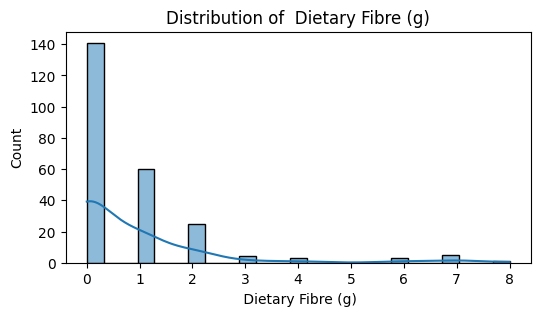

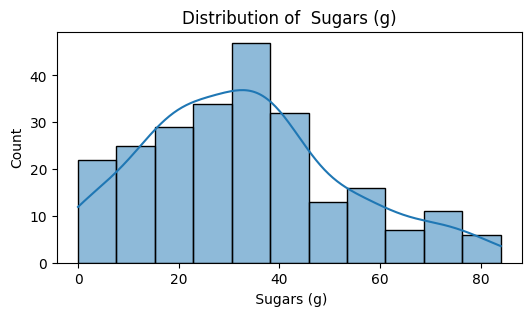

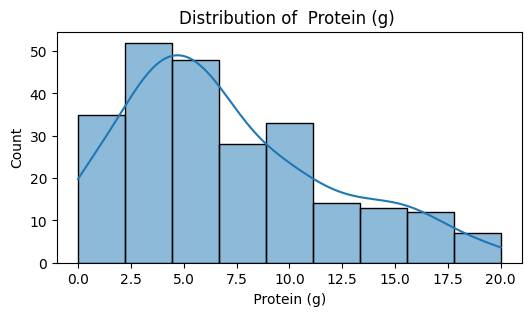

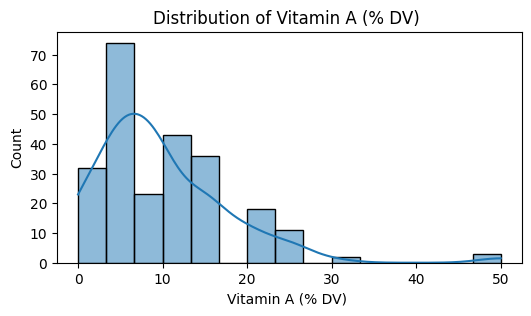

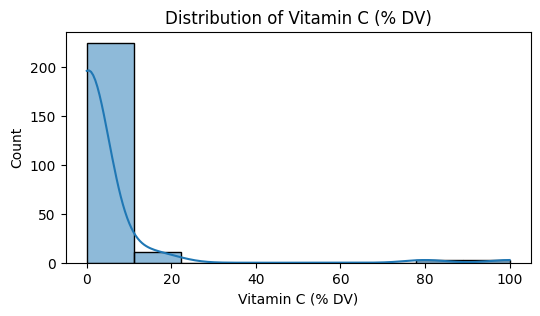

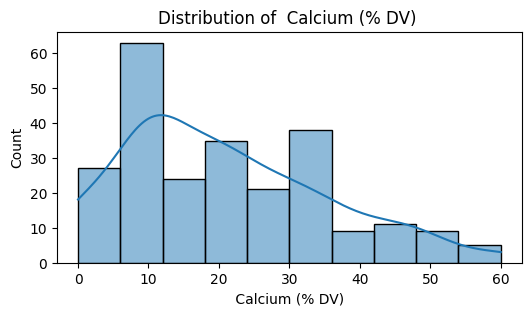

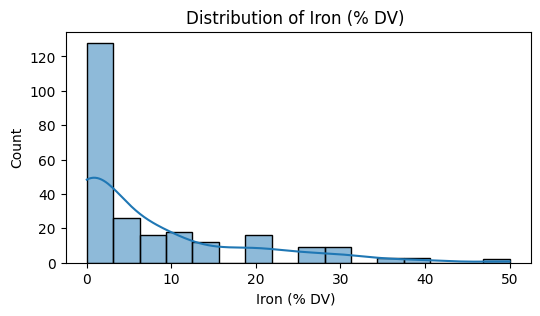

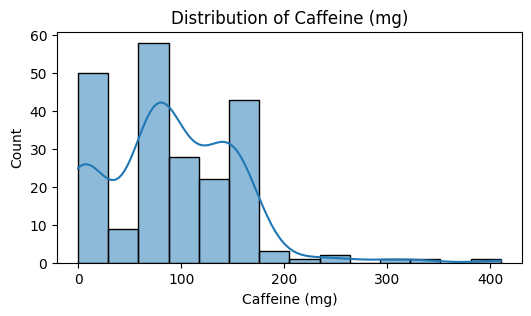

In [95]:
for col in data.iloc[:, 3:].columns:
    plt.figure(figsize=(6, 3)) # Set size of histograms
    sns.histplot(data=data, x=col, kde=True, element='bars').set_title('Distribution of ' + col) # Create histogram
    plt.show()

***From the Graph, we can see that Distribution of caffeine, Distribution of Iron %, Distribution of Vitamin C %, Distribution of Protein, Distribution of Sugars, Distribution of Dietry Fibre, Distribution of Cholesterol, Distribution of Sodium, Distribution of Trans Fat, Distribution of Total fat and Distribution of Calories are skewed to the right, meaning that there are a few data points with very high values, while the majority of the data points have lower values.***

### 3.Beverage distribution based on Calories

In [144]:
data.calories = data[['Beverage','Calories']].sort_values('Calories',ascending=False)

data.calories

,Beverage,Calories
84,White Chocolate Mocha (Without Whipped Cream),510
215,Java Chip (Without Whipped Cream),460
85,White Chocolate Mocha (Without Whipped Cream),460
83,White Chocolate Mocha (Without Whipped Cream),450
128,TazoÂ® Green Tea Latte,450
...,...,...
0,Brewed Coffee,3
105,TazoÂ® Tea,0
104,TazoÂ® Tea,0
103,TazoÂ® Tea,0


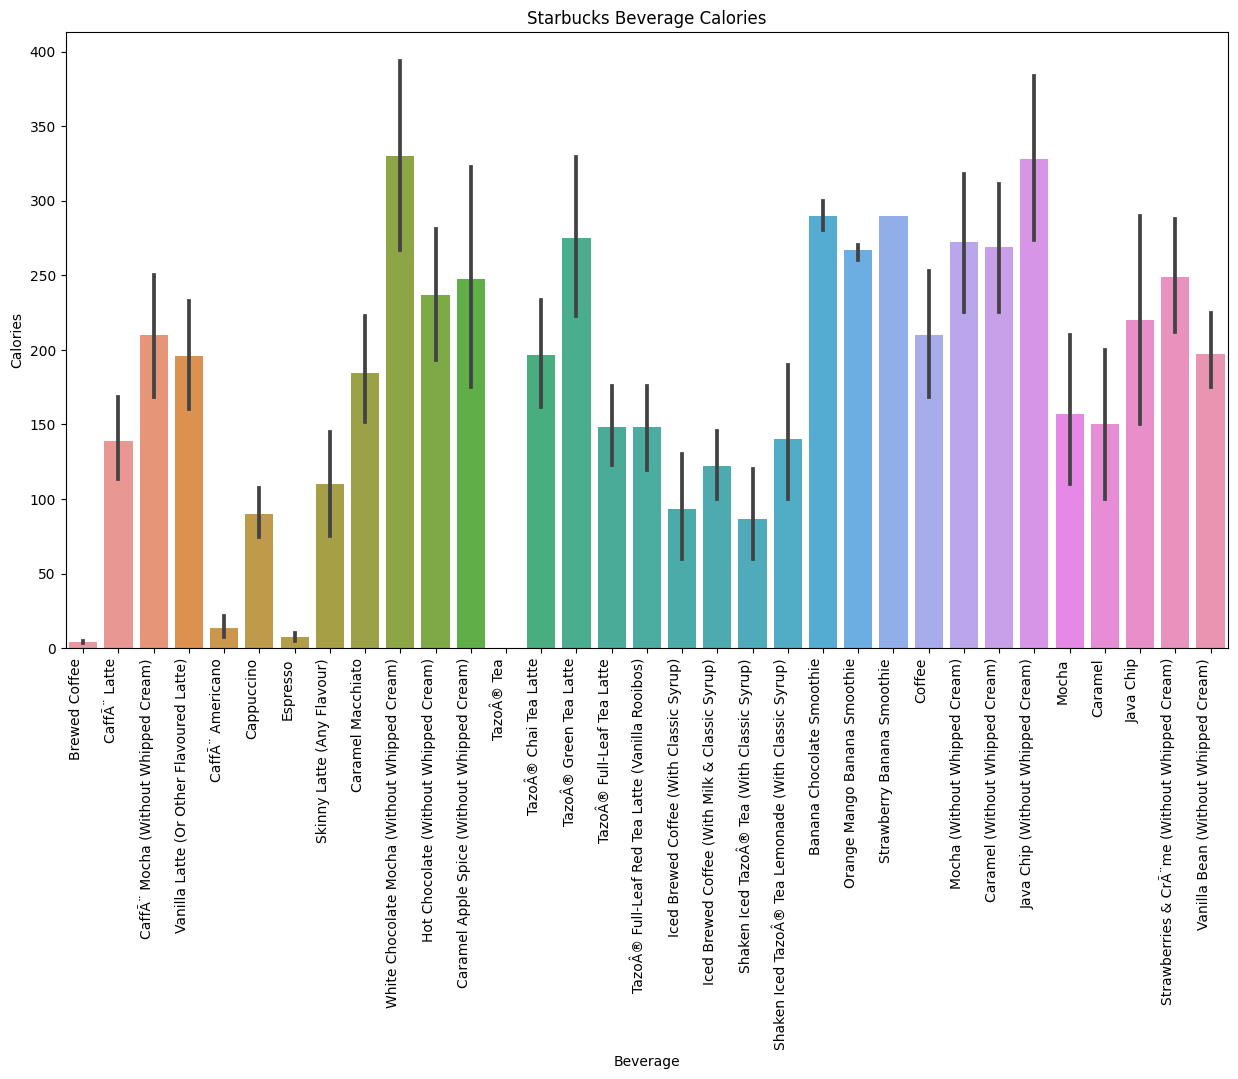

In [145]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

***The above barplot shows the beverage wise calorie distribution and here the beverage named 'Whiite chocolate mocha(without whipped cream)'and 'Java chip(without whipped cream)' has the highest calorie content and brewed coffee has the least calorie.***

### 4.Beverage distribution based on Fat


In [146]:
data.fat = data[['Beverage',' Total Fat (g)']].sort_values(' Total Fat (g)',ascending=False)

data.fat

,Beverage,Total Fat (g)
84,White Chocolate Mocha (Without Whipped Cream),15.0
85,White Chocolate Mocha (Without Whipped Cream),13.0
96,Hot Chocolate (Without Whipped Cream),11.0
81,White Chocolate Mocha (Without Whipped Cream),11.0
26,CaffÃ¨ Mocha (Without Whipped Cream),11.0
...,...,...
101,Caramel Apple Spice (Without Whipped Cream),0.0
102,TazoÂ® Tea,0.0
103,TazoÂ® Tea,0.0
104,TazoÂ® Tea,0.0


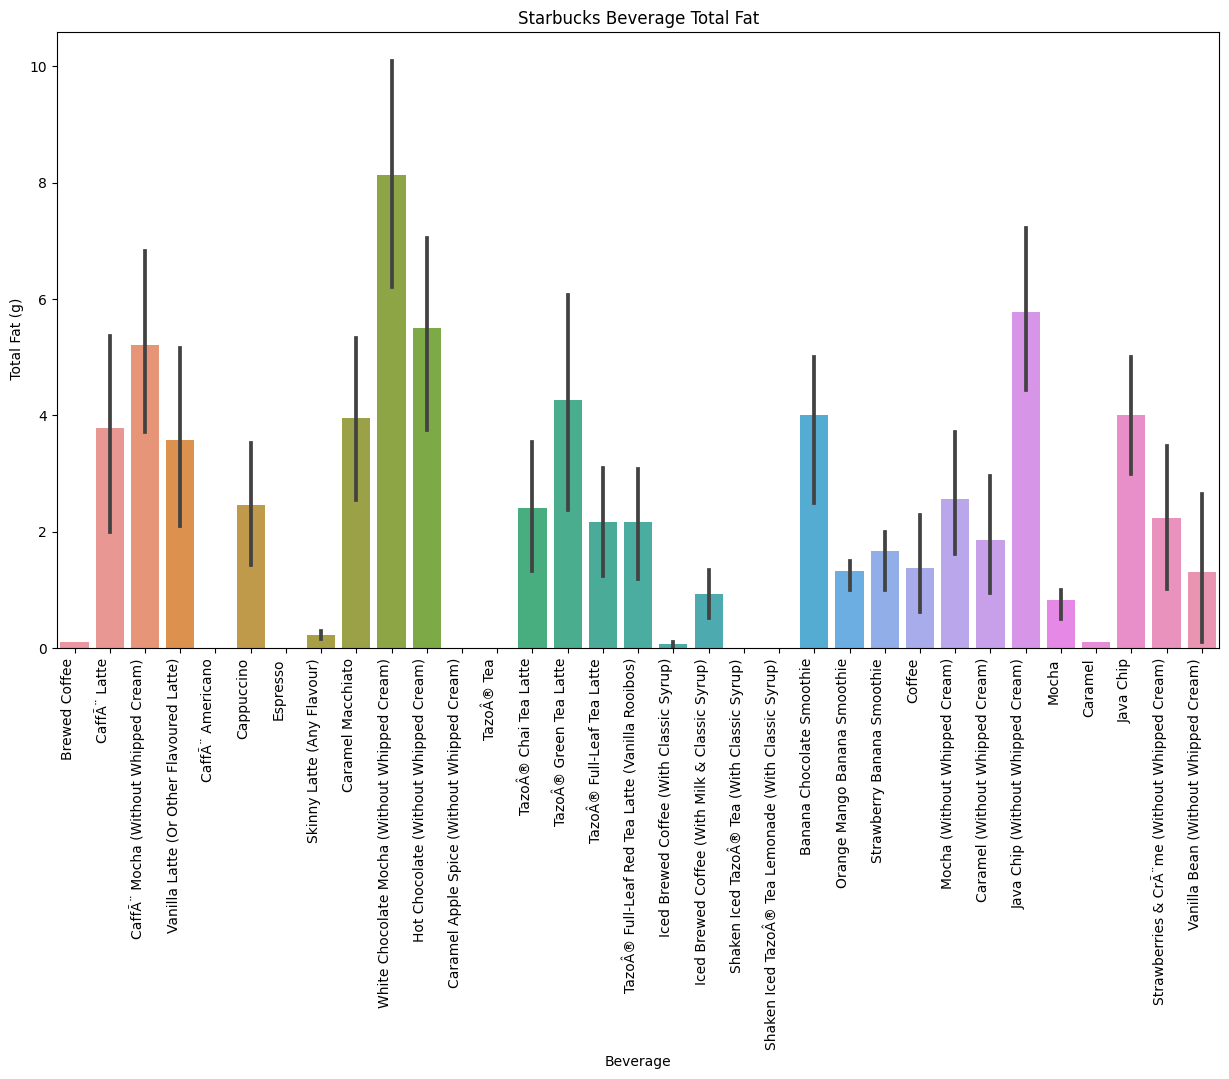

In [147]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=" Total Fat (g)", data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Total Fat")
plt.show()

### 5.Beverage distribution based on Sugar

In [139]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [140]:
data.sugar = data[['Beverage',' Sugars (g)']].sort_values(' Sugars (g)',ascending=False)

data.sugar

,Beverage,Sugars (g)
214,Java Chip (Without Whipped Cream),84
215,Java Chip (Without Whipped Cream),84
101,Caramel Apple Spice (Without Whipped Cream),83
216,Java Chip (Without Whipped Cream),80
206,Caramel (Without Whipped Cream),77
...,...,...
56,Espresso,0
57,Espresso,0
102,TazoÂ® Tea,0
103,TazoÂ® Tea,0


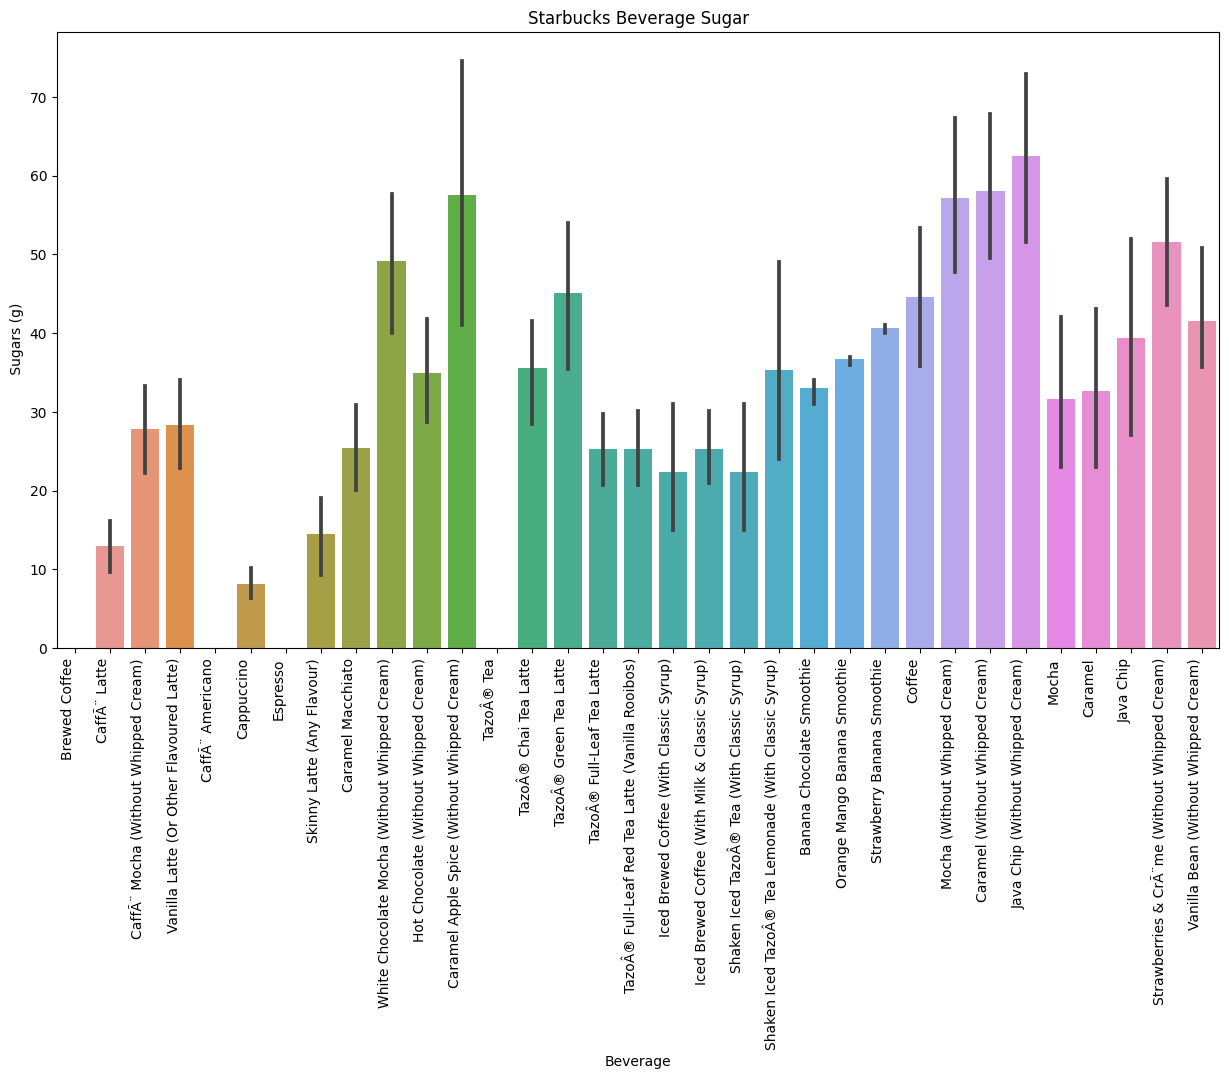

In [141]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=' Sugars (g)', data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Sugar")
plt.show()

### 5.Beverage distribution based on Cholesterol

In [142]:
data.cholesterol = data[['Beverage','Cholesterol (mg)']].sort_values('Cholesterol (mg)',ascending=False)

data.cholesterol

,Beverage,Cholesterol (mg)
215,Java Chip (Without Whipped Cream),90
214,Java Chip (Without Whipped Cream),90
101,Caramel Apple Spice (Without Whipped Cream),89
216,Java Chip (Without Whipped Cream),88
196,Mocha (Without Whipped Cream),80
...,...,...
1,Brewed Coffee,0
2,Brewed Coffee,0
3,Brewed Coffee,0
105,TazoÂ® Tea,0


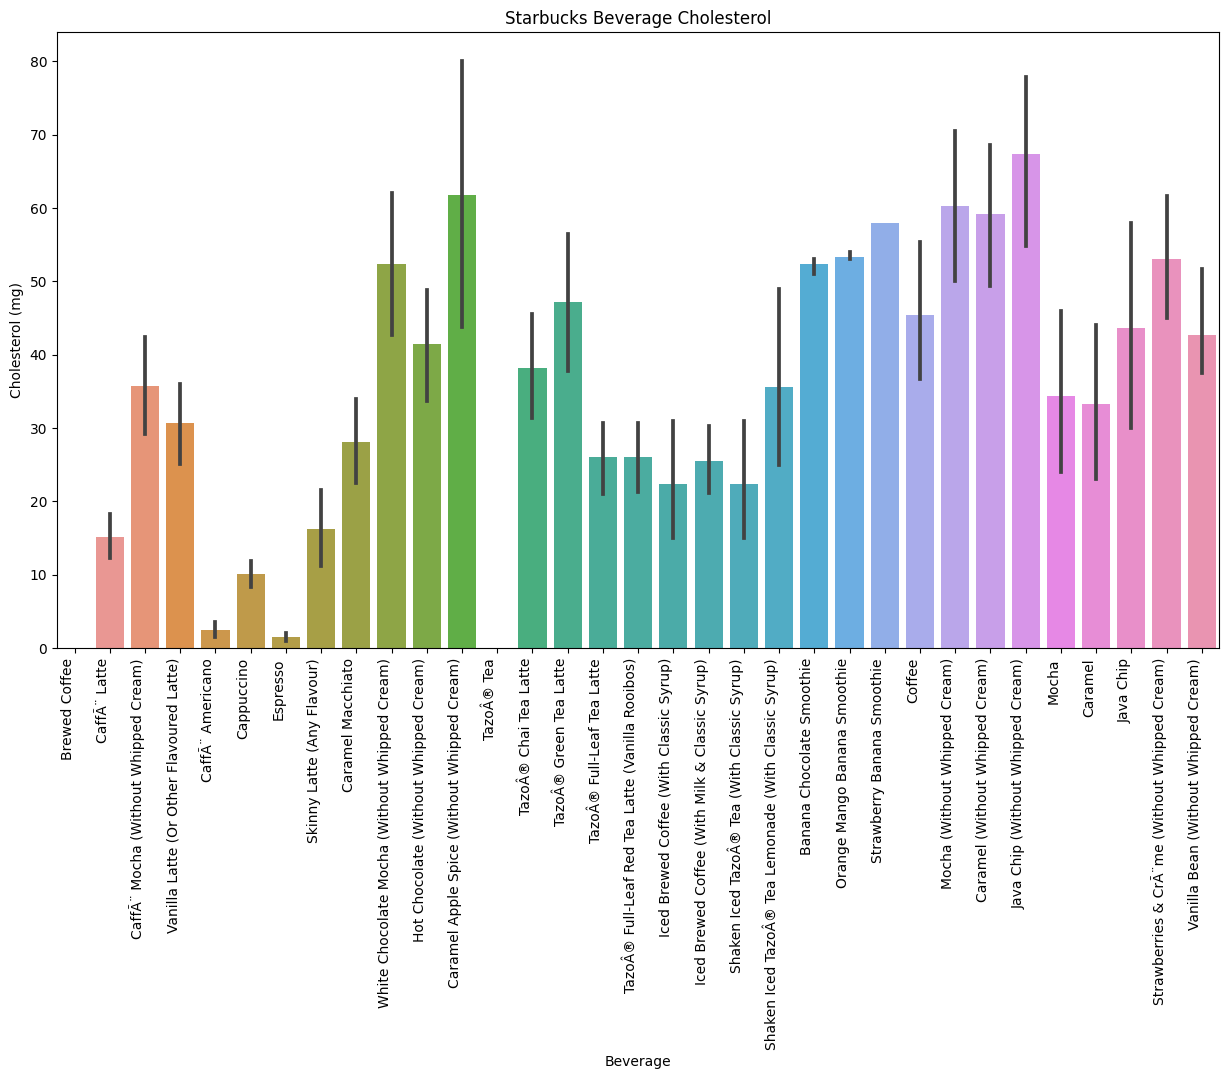

In [143]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y='Cholesterol (mg)', data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Cholesterol")
plt.show()

### 6.Beverage distribution based on Carbs

In [151]:
data.carbs = data[['Beverage',' Total Carbohydrates (g) ']].sort_values(' Total Carbohydrates (g) ',ascending=False)

data.carbs

,Beverage,Total Carbohydrates (g)
215,Java Chip (Without Whipped Cream),340
214,Java Chip (Without Whipped Cream),340
84,White Chocolate Mocha (Without Whipped Cream),330
216,Java Chip (Without Whipped Cream),330
228,Java Chip,320
...,...,...
104,TazoÂ® Tea,0
103,TazoÂ® Tea,0
102,TazoÂ® Tea,0
56,Espresso,0


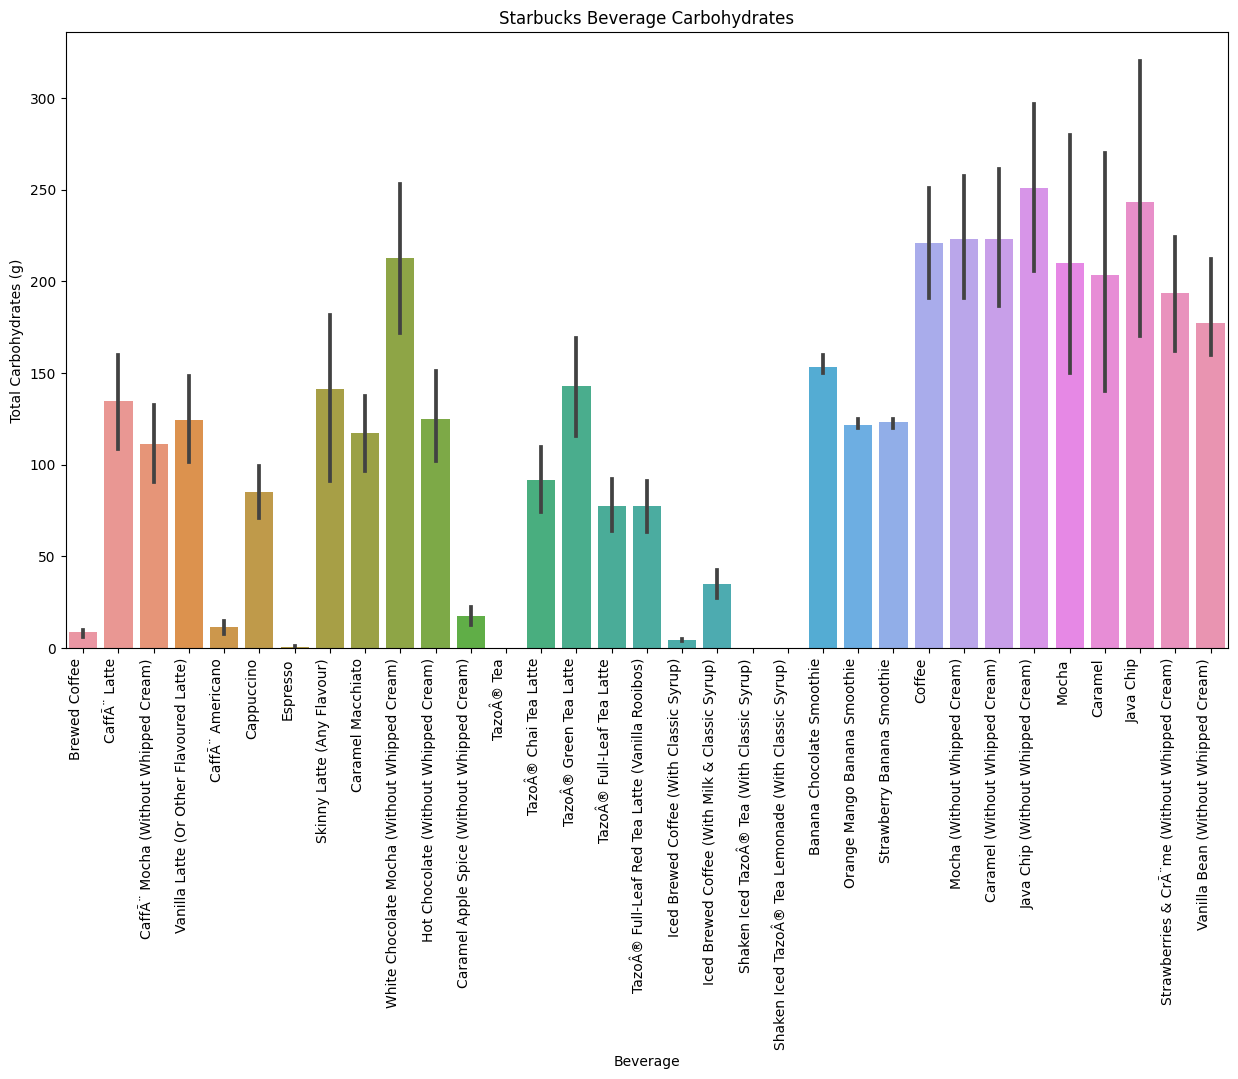

In [152]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=' Total Carbohydrates (g) ', data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Carbohydrates")
plt.show()

### 7.Beverage distribution based on Caffeine

In [148]:
data.caffeine = data[['Beverage','Caffeine (mg)']].sort_values('Caffeine (mg)',ascending=False)

data.caffeine

,Beverage,Caffeine (mg)
3,Brewed Coffee,410.0
2,Brewed Coffee,330.0
43,CaffÃ¨ Americano,300.0
1,Brewed Coffee,260.0
156,Iced Brewed Coffee (With Classic Syrup),235.0
...,...,...
168,Shaken Iced TazoÂ® Tea (With Classic Syrup),NaN
169,Shaken Iced TazoÂ® Tea Lemonade (With Classic ...,NaN
170,Shaken Iced TazoÂ® Tea Lemonade (With Classic ...,NaN
171,Shaken Iced TazoÂ® Tea Lemonade (With Classic ...,NaN


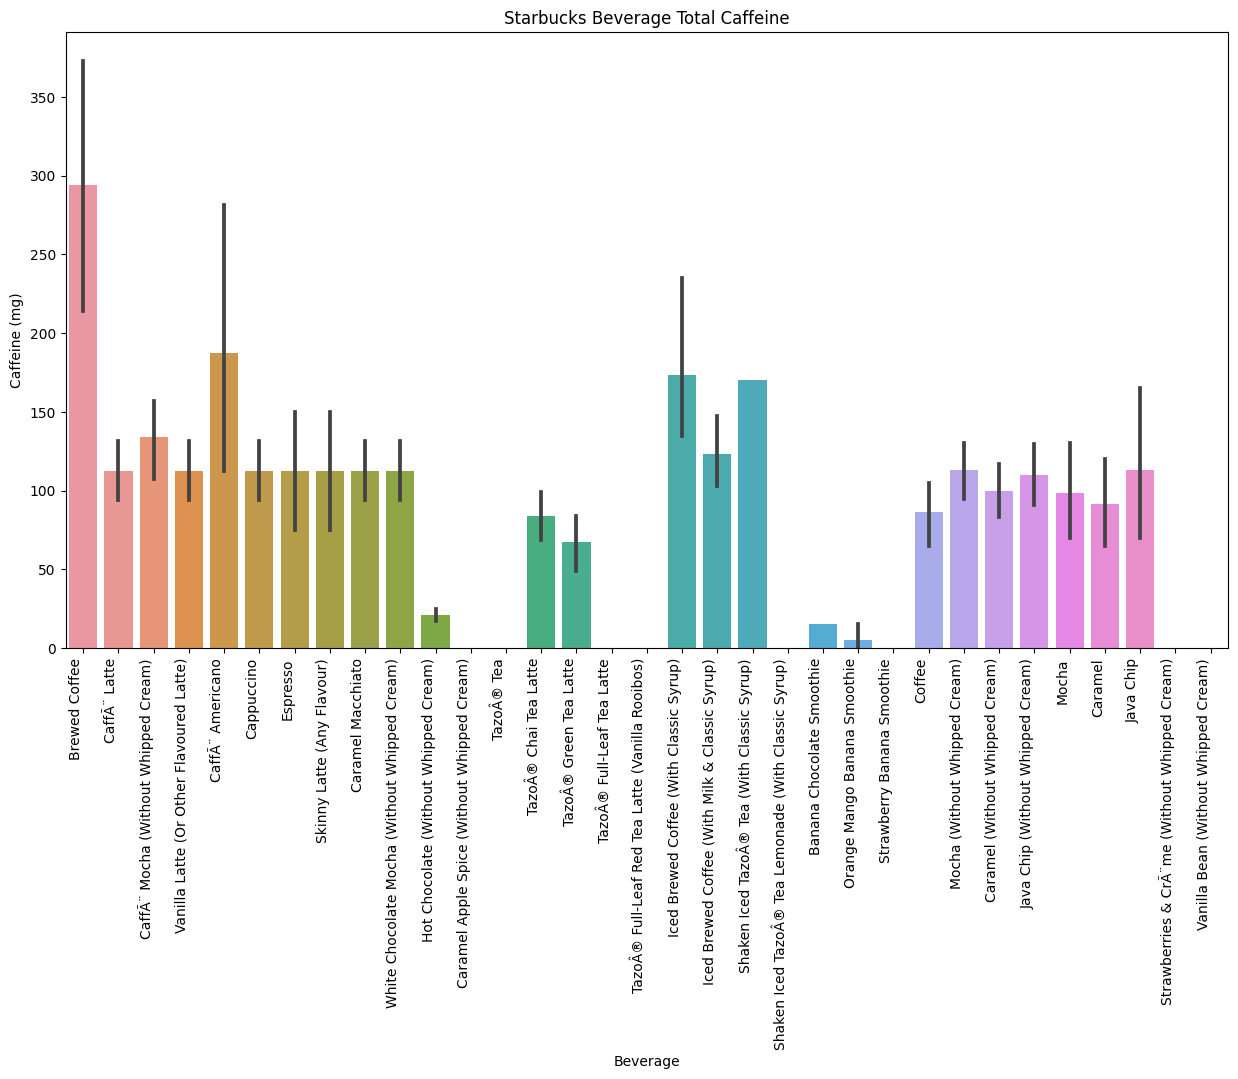

In [149]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y='Caffeine (mg)', data=data)
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage Total Caffeine")
plt.show()

### 7.Correlation 

In [121]:
print(data.iloc[:, 0:3].columns) # Categorical columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep'], dtype='object')


In [103]:
data_main = data.copy()

In [104]:
columns_to_remove = ['Beverage_category', 'Beverage', 'Beverage_prep']

data_main = data_main.drop(columns=columns_to_remove)

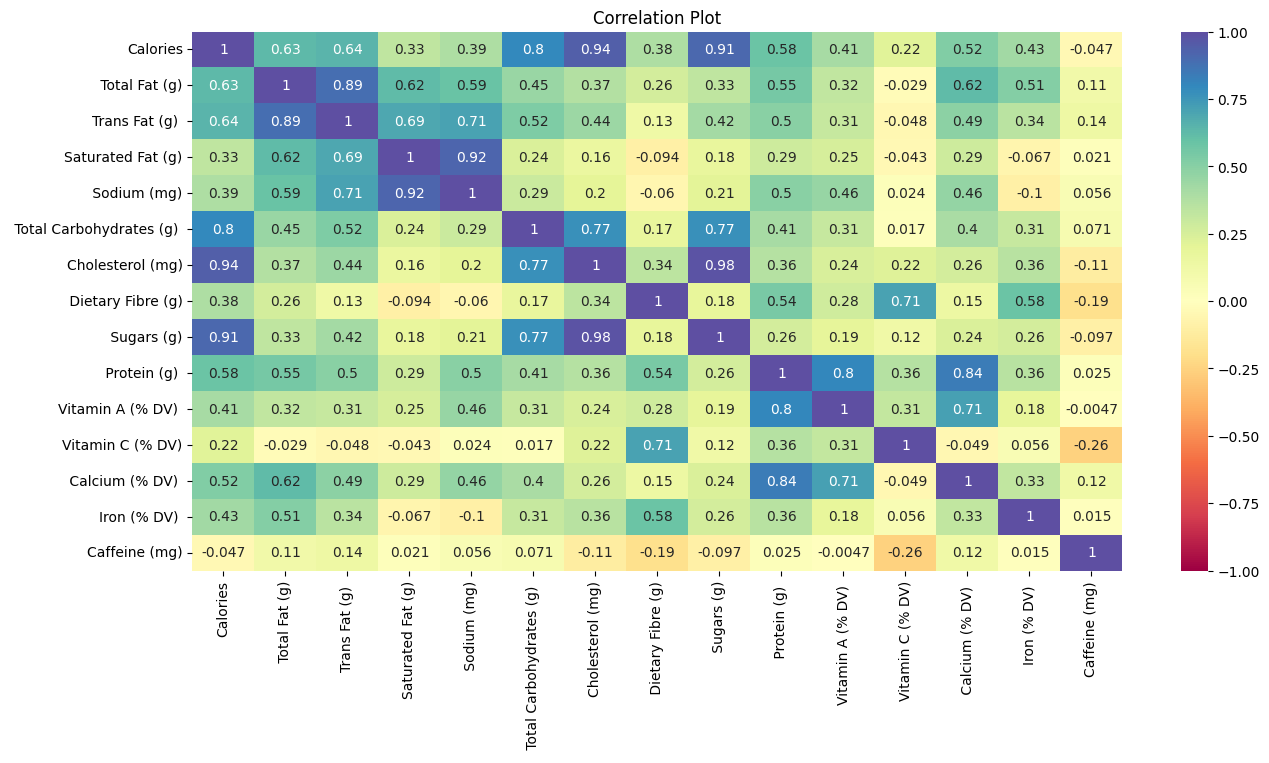

In [37]:
plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(data_main.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

***The correlation coefficient ranges from -1 to 1. As we can see , there is a high positive correlation between calories and sugar. Similarly, there is also a high positive correlation between cholestrol and sugar.***

# INFERENCES

***1. Starbucks menu has most no: of classic expresso drinks, followed by Tazzo Tea drinks. The most preferred way of making is using soy milk.***

***2.We can see that the plots showing the nutrient content in beverages is mostly right skewed, indicating that the nutrients like Calorie,Fat,Trans Fat, Cholestrol,Carbs, Sugar etc are mostly found in lower values for most beverages in terms of its count.***

***3.Few Beverages in the Menu that is best to be avoided due to high value of calorie,Fat,Sugar,Cholestrol are:***

1. White Chocolate Mocha(Without Whipped Cream)
2. Java Chip(Without Whipped Cream)
3. Caramel(Without Whipped Cream)
4. Strawberry Banana Smoothie
5. Caramel Apple Spice

***4.High Carbohydrates found in:***
1. White Chocolate Mocha(Without Whipped Cream)
2. Java Chip(Without Whipped Cream)
3. Caramel(Without Whipped Cream)
4. Java Chip
5. Coffee


***5.We can see a high positive correlation between sgar,cholesterol and calories. Its best to avoid beverages high in the mentioned nutrient category for a healthier beverage choice.***